In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(16, activation = 'relu', name = "layer_1"),
                    Dense(16, activation = 'relu'),
                    Dense(10,activation = 'softmax')
                  ])


In [5]:
# Print the model summary
#model.weights Or alternatively
model.summary


<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002995B2EE970>>

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
                    Conv2D(16,(3,3), activation = 'relu', input_shape = (28,28,1)),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation = 'softmax')
                   ])

# Print the model summary
model.summary()


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy', 'mae'])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'Sekipa',
    'Nqaza',
    'Jeresi',
    'Roko',
    'Lamba/Thopo',
    'Meqathatso',
    'Hempe',
    'Takkie',
    'Khetsi',
    'Butsi'
]
print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images /255.


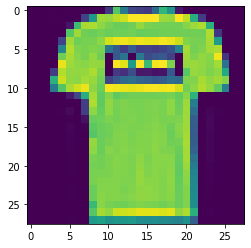

In [15]:
# Display one of the images
img = train_images[1,:,:]
plt.imshow(img)
plt.show()

#### Fit the model

In [16]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size = 256)

Epoch 1/8
235/235 [==============================] - 8s 36ms/step - loss: 0.8518 - accuracy: 0.7241 - mae: 4.4200
Epoch 2/8
235/235 [==============================] - 8s 36ms/step - loss: 0.4923 - accuracy: 0.8266 - mae: 4.4200
Epoch 3/8
235/235 [==============================] - 9s 39ms/step - loss: 0.4310 - accuracy: 0.8506 - mae: 4.4200
Epoch 4/8
235/235 [==============================] - 9s 37ms/step - loss: 0.3982 - accuracy: 0.8618 - mae: 4.4200
Epoch 5/8
235/235 [==============================] - 9s 36ms/step - loss: 0.3804 - accuracy: 0.8683 - mae: 4.4200
Epoch 6/8
235/235 [==============================] - 9s 37ms/step - loss: 0.3668 - accuracy: 0.8718 - mae: 4.4200
Epoch 7/8
235/235 [==============================] - 8s 36ms/step - loss: 0.3589 - accuracy: 0.8750 - mae: 4.4200
Epoch 8/8
235/235 [==============================] - 8s 36ms/step - loss: 0.3492 - accuracy: 0.8789 - mae: 4.4200


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.851802,0.724100,4.419999
1,0.492335,0.826583,4.420000
2,0.430961,0.850633,4.420001
3,0.398194,0.861783,4.420001
4,0.380374,0.868300,4.420001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

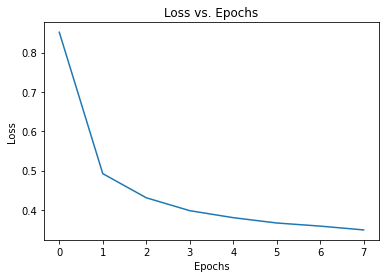

In [18]:
#Make a plot for the loss
loss_plot = df.plot(y = "loss", title = "Loss vs. Epochs", legend =False)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

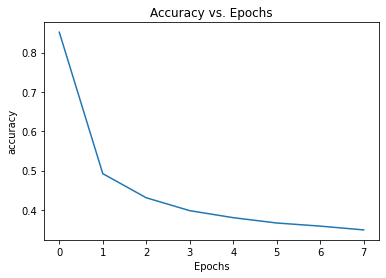

In [19]:
# Make a plot for the accuracy
loss_plot = df.plot(y = "loss", title = "Accuracy vs. Epochs", legend =False)
loss_plot.set(xlabel = "Epochs", ylabel = "accuracy")


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'mae')]

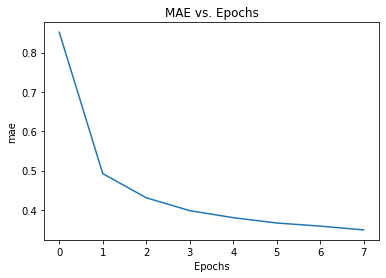

In [20]:
# Make a plot for the additional metric
loss_plot = df.plot(y = "loss", title = "MAE vs. Epochs", legend =False)
loss_plot.set(xlabel = "Epochs", ylabel = "mae")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model
test_loss, test_accuracy, tets_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 2)


313/313 - 1s - loss: 0.3678 - accuracy: 0.8718 - mae: 4.4200


#### Make predictions from the model

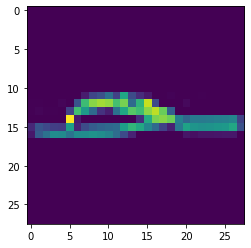

Nepe sena ke sa Meqathatso


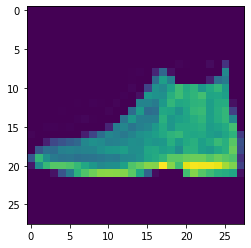

Nepe sena ke sa Butsi


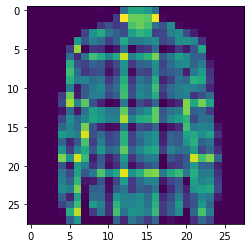

Nepe sena ke sa Hempe


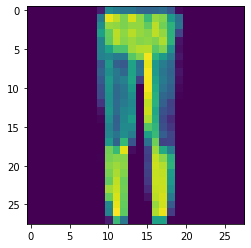

Nepe sena ke sa Nqaza


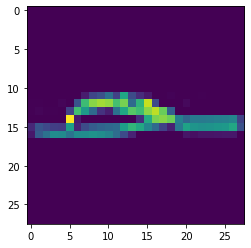

Nepe sena ke sa Meqathatso


In [67]:
# Choose a random test image
#random_inx = np.random.choice(test_images.shape[0])
inx = 30
rond = np.random.randint(9,size = (1,5))
for i in rond[0]:
    test_image = test_images[i]
    plt.imshow(test_image)
    plt.show()
    print(f"Nepe sena ke sa {labels[test_labels[i]]}")

In [68]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model preditions:{labels[np.argmax(predictions)]}")

Model preditions:Meqathatso


In [48]:
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
